In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('../data/processed/balanced.csv')
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

### Sentence BERT

In [28]:
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
X_train_vec = sbert_model.encode(X_train.tolist(), show_progress_bar=True)
X_test_vec = sbert_model.encode(X_test.tolist(), show_progress_bar=True)

Batches: 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]


#### SMOTE

In [29]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

#### Model Training

In [30]:
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    max_features='sqrt',
    random_state=42
)
clf.fit(X_train_resampled, y_train_resampled)

y_pred = clf.predict(X_test_vec)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

  Australian       0.96      0.92      0.94        24
    Jamaican       0.96      0.86      0.91        28
    Nigerian       0.72      0.93      0.81        14
    Scottish       0.64      0.70      0.67        10
 Southern US       0.78      0.75      0.77        24

    accuracy                           0.84       100
   macro avg       0.81      0.83      0.82       100
weighted avg       0.85      0.84      0.84       100



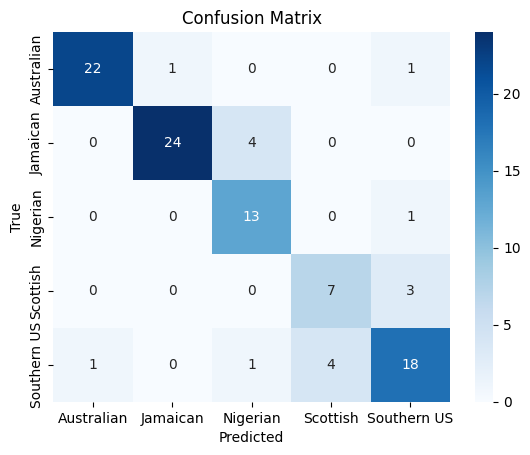

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()